(sec-qparallel)=
# A little example of quantum parallelism

## The Objective

Quantum computer can calculate many different instances simultaneously. Here we consider a simple example.  Suppose that we want to calculate $z = x \oplus y$ where $x,\, y,\, z \in \{0,1\}$.  The variables are assigned to three qubits as $|zyx\rangle = |z\rangle \otimes |y\rangle \otimes |x\rangle$.  Initially, $z=0$.  The computation corresponds to transformation $|0\rangle \otimes |y\rangle \otimes |x\rangle \Rightarrow |x \oplus y\rangle \otimes |y\rangle \otimes |x\rangle$.  There are four possible instances:

$$
\begin{align}
|000\rangle \quad &\Rightarrow \quad |000\rangle \\
|001\rangle \quad &\Rightarrow \quad |101\rangle \\
|010\rangle \quad &\Rightarrow \quad |110\rangle \\
|011\rangle \quad &\Rightarrow \quad |011\rangle
\end{align}
$$

We want to compute all these four cases at once.

## Algorithm

 We use a superposition state of the four input states. First we create four possible input states with equal weight and then we compute $x\oplus y$ for each term:

$$
\begin{align}
|000\rangle &\Rightarrow |0\rangle \otimes \frac{1}{2}\left(|0\rangle\otimes|0\rangle+|0\rangle\otimes|1\rangle+|1\rangle\otimes|0\rangle + |1\rangle\otimes|1\rangle \right) \\
&\Rightarrow \frac{1}{2}\left(|000\rangle + |101\rangle + |110\rangle + |011\rangle \right)
\end{align}
$$

Note that the output does not include all possible states.  For example $|111\rangle$ does not exist since $1\oplus 1 \ne 1$.

The first step can be done with the Walsh-Hadamard transformation.  The addition can be done with thee CX gates as shown in {numref}`sec-walsh-hadamard`. The following Qiskit example evaluates the four cases simultaneously.

## Qiskit Example

### Circuit

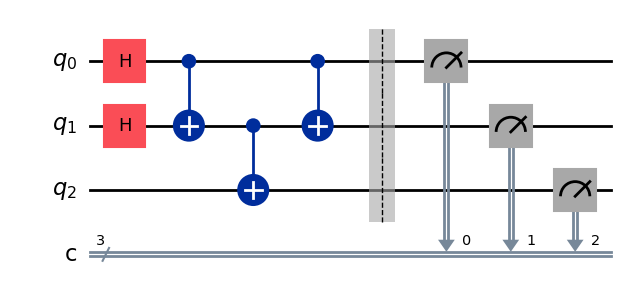

In [1]:
from qiskit import *
from qiskit_aer import Aer

cr=ClassicalRegister(3,'c')
qr=QuantumRegister(3,'q')
qc=QuantumCircuit(qr,cr)

qc.h([0,1])
qc.cx(0,1)
qc.cx(1,2)
qc.cx(0,1)
qc.barrier()
qc.measure(qr,cr)
qc.draw('mpl')

### Execution (noiseless)

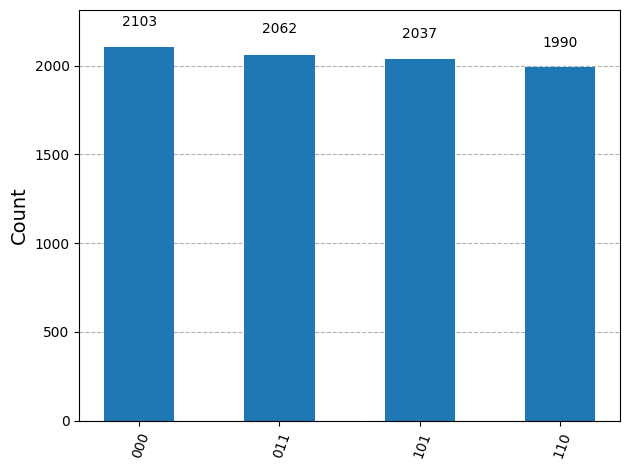

In [2]:
# Chose a general quantum simulator without noise.
# The simulator behaves as an ideal quantum computer.
backend = Aer.get_backend('qasm_simulator')

# set number of tries
nshots=8192

# execute the quantum circuit and store the outcome
job = backend.run(qc,shots=nshots)

# extract the result
result = job.result()

# count the outcome
counts = result.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)

Only four states are obtained and each shows $z = x \oplus y$. We indeed calculated four different cases at once thanks to the quantum parallelism.

### Execution (noisy)

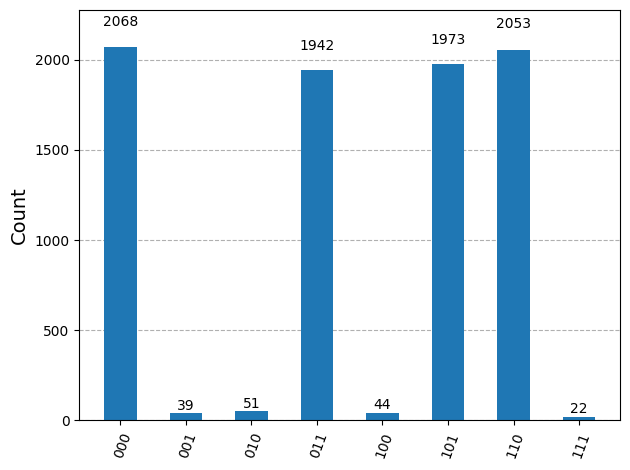

In [3]:
# using a realistic device model
from qiskit.providers.fake_provider import GenericBackendV2

backend = GenericBackendV2(num_qubits=3)

# set the number of tries
nshots=8192

# execute the circuit
job = backend.run(qc,shots=nshots)

# extract the result
result = job.result()

# count the outcome
counts = result.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)

Notice that additional states appeared due to the noises.  However, their probabilities are small and we can easily identify the four major peaks. 


---
Last modified: 08/31/2022